# 使用Random forest Classifiers/Regressor建模

## Feature_importances

## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

## 随机森林对于离散数据的处理 Random Forest Classifier

In [2]:
data = sns.load_dataset('iris') 
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
x = data.drop("species",axis=1)
y = data['species']

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train,y_train)

y_predict = rf_clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test,y_predict))

Accuracy: 1.0


## 模型预测

In [9]:
rf_clf.predict([[1,2,1,3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

## 特征变量权重分析 Feature_Importances

In [10]:
feature_list = list(x.columns)

In [11]:
feature_list

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [12]:
feature_imp = pd.Series(rf_clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

petal_width     0.439426
petal_length    0.420283
sepal_length    0.097544
sepal_width     0.042747
dtype: float64

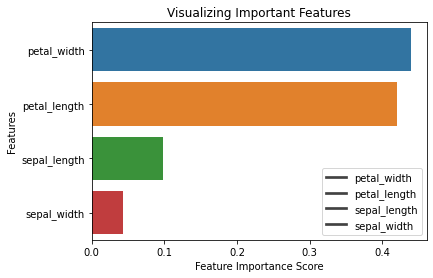

In [13]:
sns.barplot(x=feature_imp,y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend(feature_imp.index)
plt.show()

## 缩减特征变量X,对具有成百上千特征变量的大数据很有意义

In [14]:
x = x.drop(["sepal_width"],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [15]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train,y_train)

y_predict = rf_clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_predict))

Accuracy: 0.9333333333333333


## 随机森林对于连续数据的数理 Random Forest for Regression

In [17]:
dataset = pd.read_csv("../data/petrol_consumption.csv")

In [18]:
dataset

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [20]:
x = dataset.iloc[:,0:4]
y = dataset.iloc[:,4]

In [21]:
x

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## 数据标准化  Feature Scaling Scikit-Learn's StandardScaer

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train

array([[-1.32525691e-01,  1.50577399e+00,  2.25854636e+00,
        -9.15791057e-01],
       [-6.28192647e-01, -1.83367022e+00,  2.12333843e-01,
        -1.12852703e+00],
       [-1.32525691e-01, -1.78897047e+00, -4.54194551e-01,
        -5.25775100e-01],
       [-1.32525691e-01, -8.78212954e-01,  8.77245103e-01,
         4.15208375e-02],
       [-6.28192647e-01,  1.27482526e+00,  1.07480487e+00,
         2.89712810e-01],
       [ 1.35447518e+00, -8.42825648e-01, -1.13743332e+00,
         5.92488356e-02],
       [-6.28192647e-01, -4.00925436e-02, -4.64436395e-01,
         8.21552752e-01],
       [-6.28192647e-01,  7.42153173e-01,  2.93282707e-02,
         2.61208055e+00],
       [-6.28192647e-01,  8.82232011e-04,  1.22196399e+00,
         1.65616824e-01],
       [ 3.63141265e-01, -2.41241442e-01,  4.54996025e-02,
        -2.42127131e-01],
       [ 1.35447518e+00,  1.07926383e+00, -9.04835665e-01,
        -1.16398303e+00],
       [-6.28192647e-01, -2.07716626e-01,  7.28199328e-01,
      

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 100)
rf_reg.fit(x_train,y_train)

y_predict = rf_reg.predict(x_test)

## 结果评估 Evaluating the Algorithm

In [26]:
from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error: 49.762000000000015
Mean Squared Error: 4003.5299200000018
Root Mean Squared Error: 63.2734535172532


## 调节随机森林 参数n_estimators

In [27]:
rmse = nestimators = []

for n in [20,30,50,80,100,150,200,300,400,500,600,700,800]:
    rf_reg = RandomForestRegressor(n_estimators = n)
    rf_reg.fit(x_train,y_train)
    y_predict = rf_reg.predict(x_test)
    print('--------------------------')
    print("nestimators={}".format(n))
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_predict))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_predict))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
    
    rmse = np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
    nestimators = np.append(nestimators,n)
    

--------------------------
nestimators=20
Mean Absolute Error: 48.39
Mean Squared Error: 3895.9830000000015
Root Mean Squared Error: 62.41780995837647
--------------------------
nestimators=30
Mean Absolute Error: 52.25999999999999
Mean Squared Error: 3855.9902222222217
Root Mean Squared Error: 62.096620054735844
--------------------------
nestimators=50
Mean Absolute Error: 44.251999999999995
Mean Squared Error: 3281.836959999999
Root Mean Squared Error: 57.28731936475994
--------------------------
nestimators=80
Mean Absolute Error: 47.9675
Mean Squared Error: 3441.022437500001
Root Mean Squared Error: 58.66022875424201
--------------------------
nestimators=100
Mean Absolute Error: 50.047000000000004
Mean Squared Error: 3604.667629999999
Root Mean Squared Error: 60.03888431674925
--------------------------
nestimators=150
Mean Absolute Error: 51.32666666666667
Mean Squared Error: 3799.820097777777
Root Mean Squared Error: 61.64268081271106
--------------------------
nestimators=200


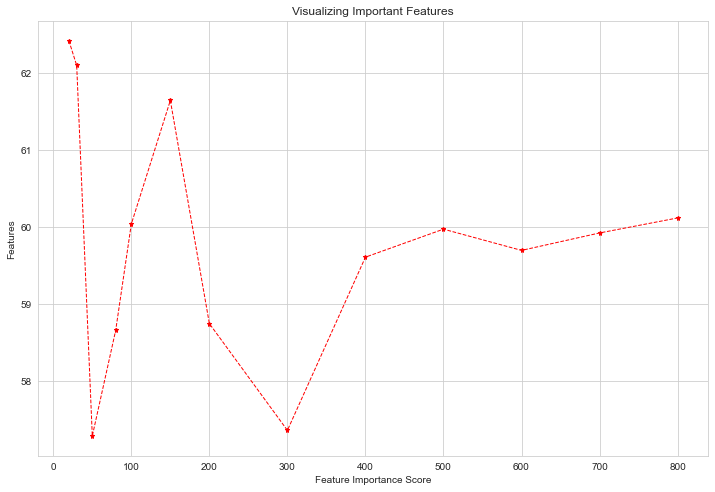

In [34]:
plt.figure(figsize=(12,8))

sns.set_style("whitegrid")
plt.plot(nestimators,rmse,'r*',linestyle="dashed",linewidth=1,markersize=5)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()